# Networks: structure, evolution & processes
**Internet Analytics - Lab 2**

---

**Group:** *O.*

**Names:**

* *Argelaguet Franquelo, Pau*
* *Maillard, Mathias*
* *du Bois de Dunilac, Vivien*

---

#### Instructions

*This is a template for part 1 of the lab. Clearly write your answers, comments and interpretations in Markodown cells. Don't forget that you can add $\LaTeX$ equations in these cells. Feel free to add or remove any cell.*

*Please properly comment your code. Code readability will be considered for grading. To avoid long cells of codes in the notebook, you can also embed long python functions and classes in a separate module. Don’t forget to hand in your module if that is the case. In multiple exercises, you are required to come up with your own method to solve various problems. Be creative and clearly motivate and explain your methods. Creativity and clarity will be considered for grading.*

In [1]:
%matplotlib inline
import collections
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import random

---

## 2.1 Exploration of real networks

#### Exercise 2.1

In [2]:
G1 = nx.read_adjlist("../data/network1.csv", delimiter=",", comments="#")
num_nodes = G1.number_of_nodes()

print("Number of nodes:", num_nodes)
print("Number of edges:", G1.number_of_edges())

Number of nodes: 13033
Number of edges: 18584


#### Exercise 2.2:  Node degree distribution

1) The used plot is a histogram with logarithmic scale.

2) We can see that most nodes have small degree, so the distribution is decreasing towards few nodes with higher degrees.

3) 

In [3]:
def plot_node_degree_distribution(G):
    degree_sequence = sorted([d for n, d in G.degree()], reverse=True)
    degree_count = collections.Counter(degree_sequence)

    values, labels = zip(*degree_count.items())

    indexes = np.arange(len(labels))
    width = 1

    plt.bar(indexes, values, width, log=True)
    plt.xticks(indexes, labels)

    plt.xlabel('Degree')
    plt.ylabel('Count')

    plt.show()

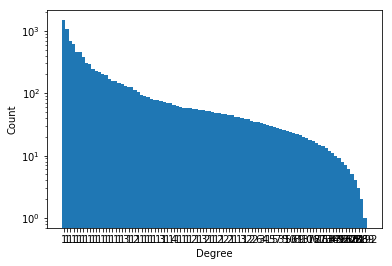

In [4]:
plot_node_degree_distribution(G1)

#### Exercise 2.3: Giant component

In [5]:
print("Number of connected components:", nx.number_connected_components(G1))

giant = max(nx.connected_component_subgraphs(G1), key=len)
print("Number of nodes in the giant component:", giant.number_of_nodes())

Number of connected components: 192
Number of nodes in the giant component: 12576


#### Exercise 2.4: Short paths & Small-worlds

In [10]:
iterations = 10000
dists = []

for i in range(iterations):
    try:
        x = str(random.randint(0, num_nodes-1))
        y = str(random.randint(0, num_nodes-1))
        spl = nx.shortest_path_length(G1, x, y)
        dists.append(spl)
    except nx.NetworkXNoPath:
        pass
    
avg = sum(dists) / len(dists)
print("Average length:", avg)

Average length: 4.168532070598364


#### Exercise 2.5: Network comparison

Number of nodes: 26542
Number of edges: 43516
Number of connected components: 5
Number of nodes in the giant component: 26481


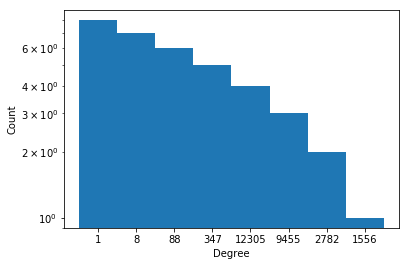

In [7]:
G2 = nx.read_adjlist("../data/network2.csv", delimiter=",", comments="#")

print("Number of nodes:", G2.number_of_nodes())
print("Number of edges:", G2.number_of_edges())

print("Number of connected components:", nx.number_connected_components(G2))

giant = max(nx.connected_component_subgraphs(G2), key=len)
print("Number of nodes in the giant component:", giant.number_of_nodes())

plot_node_degree_distribution(G2)

#### Exercise 2.6: Network identification